
#### **Projected Birth-rates - Jupyter Notebook**
In this notebook, I will load the CSO projected birth-rates dataset, inspect its variables, automatically detect the relevant columns, clean the data, and generate a clear plot of projected birth rates in Ireland over time.


---


#### **Importing the Necessary Libraries**
To work with the dataset, pandas will be used for handling data and matplotlib for plotting. Pandas provide convenient tools for reading, cleaning, and analyzing tabular data, while matplotlib allows enables the ability to create flexible and informative visualizations.


In [8]:
%matplotlib inline
import pandas as pd                 # Pandas library for data manipulation
import matplotlib.pyplot as plt     # Matplotlib for plotting


#### **Load the Dataset**

The next step is to load the file projectedbirths-cso.csv, which contains the projected number or rate of births in Ireland.

In [9]:
csv_path = r"C:\Users\CAD-PC\Desktop\GitHub - Cloned Repository\PFDA\My-Work\Week-1\projectedbirths-cso.csv"  # full path to the CSV file
births = pd.read_csv(csv_path)                  # load data into a pandas DataFrame
births.head()                                   # preview the first few rows


,Statistic Label,Year,Sex,Criteria for Projection,UNIT,VALUE
0,Projected Annual Births,2023,Both sexes,Method - M1,Number,57537
1,Projected Annual Births,2024,Both sexes,Method - M1,Number,55528
2,Projected Annual Births,2025,Both sexes,Method - M1,Number,55292
3,Projected Annual Births,2026,Both sexes,Method - M1,Number,55032
4,Projected Annual Births,2027,Both sexes,Method - M1,Number,54462


#### **Inspect Columns & Data Types**
To understand the structure of the dataset, the data needs to be inspected to see what columns are available (for example, Year, Births, or Scenario), the number of entries in each column, and their data types etc.




In [10]:

births.info()                                   # display dataset structure, column names, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Statistic Label          35 non-null     object
 1   Year                     35 non-null     int64 
 2   Sex                      35 non-null     object
 3   Criteria for Projection  35 non-null     object
 4   UNIT                     35 non-null     object
 5   VALUE                    35 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


#### **Inspect Columns & Data Types**
Next step is to find which columns contain the year and the birth data. Different files may use slightly different names, so this code checks for common ones automatically.

In [11]:
year_col = 'Year'                               # year column
value_col = 'VALUE'                             # birth-rate or birth count column



#### **Cleaning & Preparing the Data**
To make sure the year and birth columns contain numbers only, we'll use `pd.to_numeric()` to convert them into numeric data types. At the same time, also remove any missing values, sort by year, and combine duplicate years (if there are any) by taking their average.

In [12]:
births[year_col] = pd.to_numeric(births[year_col], errors='coerce')   # ensure numeric year
births[value_col] = pd.to_numeric(births[value_col], errors='coerce') # ensure numeric values

df = births.dropna(subset=[year_col, value_col]).copy()               # remove missing rows
df = df.sort_values(year_col)                                         # sort by year
df = df.groupby(year_col, as_index=False)[value_col].mean()           # average any duplicates
df.tail()                                                             # show last few rows


,Year,VALUE
30,2053,53854.0
31,2054,53360.0
32,2055,52839.0
33,2056,52340.0
34,2057,51897.0


#### **Plotting the Projected Birth rates Over Time**
Now that the data is clean, a line plot can be used to show how the projected birth-rates change over time

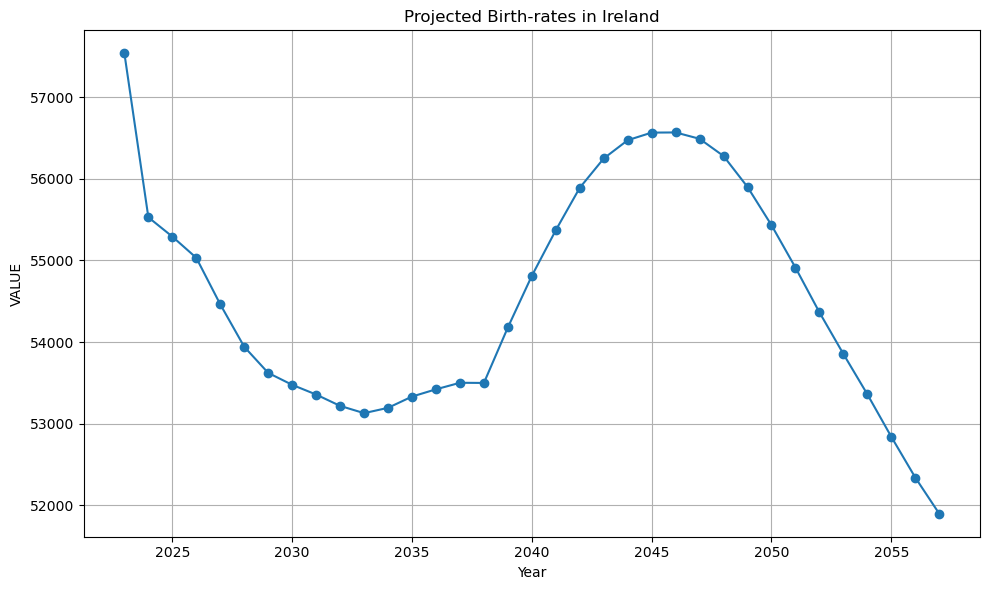

In [13]:
%matplotlib inline
plt.figure(figsize=(10, 6))                        # set figure size
plt.plot(df[year_col], df[value_col], marker='o')  # plot year vs. birth-rate
plt.title("Projected Birth-rates in Ireland")      # chart title
plt.xlabel(year_col)                               # x-axis label
plt.ylabel(value_col)                              # y-axis label
plt.grid(True)                                     # show grid
plt.tight_layout()                                 # tidy layout
plt.show()                                         # display the plot


#### **Summary File**
Small summary text file showing useful details about the dataset

In [14]:
summary = {                                       # store summary info
    'rows_original': len(births),                 # total rows before cleaning
    'rows_plotted' : len(df),                     # rows used in the final plot
    'year_start'   : int(df[year_col].min()),     # first year in dataset
    'year_end'     : int(df[year_col].max()),     # last year in dataset
    'value_min'    : float(df[value_col].min()),  # smallest value
    'value_max'    : float(df[value_col].max()),  # largest value
    'value_column' : value_col,                   # name of the value column
    'year_column'  : year_col,                    # name of the year column
    'source_file'  : csv_path                     # source file path
}

with open("birthrates_summary.txt", "w") as f:    # create a text file
    for k, v in summary.items():                  # write each item to a new line
        f.write(f"{k}: {v}\n")

print("Saved summary to birthrates_summary.txt")  # confirm when done


Saved summary to birthrates_summary.txt
